In [1]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 742.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 852.1 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 318.9 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [5]:
# Specify the path to your Excel file
excel_file_path = 'CSI300.xlsx'

# Load the Excel file
excel_data = pd.ExcelFile(excel_file_path)

# Iterate through each sheet and save it as a CSV file
for sheet_name in excel_data.sheet_names:
    # Read the data from the current sheet
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    
    # Specify the CSV file path (you can customize the naming)
    csv_file_path = f'{sheet_name}.csv'
    
    # Save the current sheet as a CSV file
    df.to_csv(csv_file_path, index=False)

print("Conversion completed!")

Conversion completed!


4856.4
[   0.         4235.50841865 5810.82289324 4849.69336021 5026.34937235
 4142.87463548 5808.26565495 5866.90924689 4301.53770273 4829.69126976
 5552.63831621 5242.24294686 4598.76680794 4773.13370625 5130.43948414
 4526.21818087 5547.92933985 4514.8929845  4391.3752815  5243.77007676
 4026.82473767 4369.34548834 5007.54685037 5224.74318651 4563.81625344
 5742.5601599  4277.28950152 4806.59345519 4907.12023109 5127.95322328
 4741.34160055 5799.81371114 5108.51808788 4489.57067685 4672.12242609
 5084.64474357 4873.02833741 5283.49842014 6065.95145394 4670.57680187
 4494.57353338 4552.34523295 4613.60449243 4270.26395411 4667.51973574
 6307.40419779 4868.71448542 4116.58032574 4440.59528737 4853.07702221
 5195.9352376  5445.06633079 4399.14685192 5594.01431896 4640.17270622
 4997.33600309 5149.90716117 5262.56838152 4024.50838278 5167.75978708
 4595.40106305 4697.77374315 4501.56918332 5051.63072899 5480.67141569
 4458.41240052 5255.19550525 4879.48830686 4570.18460197 5306.89066423

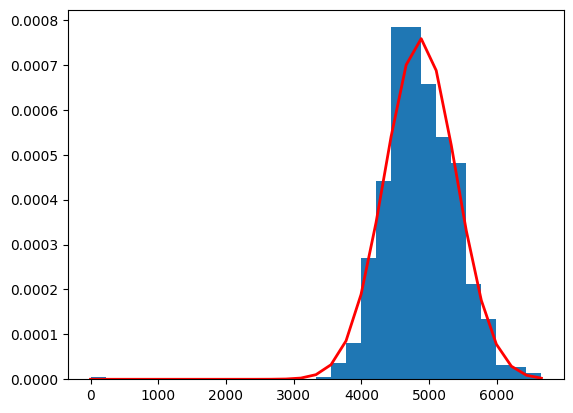

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
IF1_path = 'IF_1.csv'

# Read the CSV file
IF1 = pd.read_csv(IF1_path)

# Extract the specific columns
new_close_pl_rate = IF1['new_close_pl_rate']
new_settle_pl_rate = IF1['new_settle_pl_rate']
price = IF1['new_close']

# Display the columns

mu = new_close_pl_rate.mean()
sigma = new_close_pl_rate.std()


# Given values
S_0 = price[0]  # example initial stock price
print(S_0)
t = 1/100  # example time period
  # simulate the Wiener process

s = np.zeros(1000)

# Calculate St using the GBM formula
for i in range(1, 1000):
    s_t = S_0
    for n in range(1,100):
        W_t = np.random.standard_normal()
        s_t = s_t * np.exp((mu - 0.5 * sigma**2) * t + sigma * W_t)
    s[i] = s_t

print(s)
sigma_s = np.std(s)
mu_s = np.mean(s)


count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma_s * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_s)**2 / (2 * sigma_s**2) ),
         linewidth=2, color='r')

        

